#  Imports

In [1]:
# --- Environment (must be set before importing jax) ---
import os
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".99"
import jax
import mmml
import numpy as np
import matplotlib.pyplot as plt
print(jax.devices())
data = np.load("dataset1.npz", allow_pickle=True)
data.keys()

[CudaDevice(id=0)]


KeysView(NpzFile 'dataset1.npz' with keys: R, Z, D, Ef, E)

(array([1.000e+00, 2.000e+00, 4.000e+00, 2.200e+01, 1.100e+02, 3.610e+02,
        1.406e+03, 5.138e+03, 2.812e+03, 1.440e+02]),
 array([-9.02483342, -7.82961667, -6.63439991, -5.43918315, -4.24396639,
        -3.04874964, -1.85353288, -0.65831612,  0.53690063,  1.73211739,
         2.92733415]),
 <BarContainer object of 10 artists>)

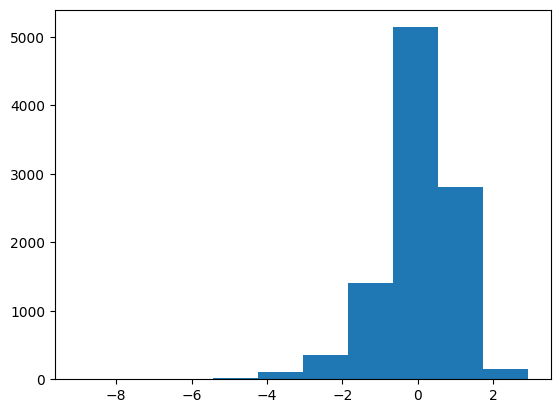

In [2]:
plt.hist(data["E"])

In [3]:
params = "params-e2db485b-db37-408f-b5bd-6c10dc8093c2.json"
data ="data-full.npz"

# Training

In [14]:
from training import *
params = "params-4184d23d-b4b7-4482-b187-9b0284457f55.json"

# Option 2: Override specific parameters
args = get_args(
    data=data,
    # restart=params,
    features=32,
    max_degree=2,
    num_iterations=2,
    num_basis_functions=32,
    cutoff=10.0,
    num_train=8000,
    num_valid=100,
    num_epochs=200,
    learning_rate=0.0003,
    batch_size=100,
    clip_norm=1.0,
    ema_decay=0.5,
    early_stopping_patience=None,
    early_stopping_min_delta=0.0,
    reduce_on_plateau_patience=5,
    reduce_on_plateau_cooldown=5,
    reduce_on_plateau_factor=0.9,
    reduce_on_plateau_rtol=1e-4,
    reduce_on_plateau_accumulation_size=5,
    reduce_on_plateau_min_scale=0.01,
    energy_weight=5.0,
    forces_weight=10.0,
    dipole_weight=5.0,
    dipole_field_coupling=True,
    field_scale=0.01,
)

# Print arguments to verify
print("Arguments:")
for arg in vars(args):
    print(f"  {arg}: {getattr(args, arg)}")



Arguments:
  data: data-full.npz
  features: 32
  max_degree: 2
  num_iterations: 2
  num_basis_functions: 32
  cutoff: 10.0
  num_train: 8000
  num_valid: 100
  num_epochs: 200
  learning_rate: 0.0003
  batch_size: 100
  clip_norm: 1.0
  ema_decay: 0.5
  early_stopping_patience: None
  early_stopping_min_delta: 0.0
  reduce_on_plateau_patience: 5
  reduce_on_plateau_cooldown: 5
  reduce_on_plateau_factor: 0.9
  reduce_on_plateau_rtol: 0.0001
  reduce_on_plateau_accumulation_size: 5
  reduce_on_plateau_min_scale: 0.01
  restart: None
  energy_weight: 5.0
  forces_weight: 10.0
  dipole_weight: 5.0
  charge_weight: 1000.0
  dipole_field_coupling: True
  field_scale: 0.01


In [15]:
from training import get_args, main
_ = main(args)

Arguments:
  data: data-full.npz
  features: 32
  max_degree: 2
  num_iterations: 2
  num_basis_functions: 32
  cutoff: 10.0
  num_train: 8000
  num_valid: 100
  num_epochs: 200
  learning_rate: 0.0003
  batch_size: 100
  clip_norm: 1.0
  ema_decay: 0.5
  early_stopping_patience: None
  early_stopping_min_delta: 0.0
  reduce_on_plateau_patience: 5
  reduce_on_plateau_cooldown: 5
  reduce_on_plateau_factor: 0.9
  reduce_on_plateau_rtol: 0.0001
  reduce_on_plateau_accumulation_size: 5
  reduce_on_plateau_min_scale: 0.01
  restart: None
  energy_weight: 5.0
  forces_weight: 10.0
  dipole_weight: 5.0
  charge_weight: 1000.0
  dipole_field_coupling: True
  field_scale: 0.01
Hyperparameters:
  restart: None
  features: 32
  max_degree: 2
  num_iterations: 2
  num_basis_functions: 32
  cutoff: 10.0
  num_train: 8000
  num_valid: 100
  num_epochs: 200
  learning_rate: 0.0003
  batch_size: 100
  clip_norm: 1.0
  ema_decay: 0.5
  early_stopping_patience: None
  early_stopping_min_delta: 0.0
  re

In [7]:
params = "params-e2db485b-db37-408f-b5bd-6c10dc8093c2.json"
data = "data-full.npz"

# Evaluate

In [10]:

import jax
import mmml
import numpy as np
import matplotlib.pyplot as plt
print(jax.devices())

from evaluate import *
args = get_args(
    params=params,
    data=data,
    batch_size=100,
    output_dir="results"
)

[CudaDevice(id=0)]


Model Evaluation
Parameters: params-e2db485b-db37-408f-b5bd-6c10dc8093c2.json
Data: data-full.npz
Output directory: results
Batch size: 100

Loading dataset from data-full.npz...
Dataset keys: ['R', 'Z', 'D', 'E', 'F', 'P', 'Ef']
Dataset shapes:
  R: (10000, 1, 29, 3)
  Z: (10000, 29)
  D: (10000, 3)
  E: (10000,)
  F: (10000, 1, 29, 3)
  P: (10000, 1, 3, 3)
  Ef: (10000, 3)

Loading parameters from params-e2db485b-db37-408f-b5bd-6c10dc8093c2.json...
✓ Parameters loaded
✓ Found matching config file: config-e2db485b-db37-408f-b5bd-6c10dc8093c2.json

Loading model config from config-e2db485b-db37-408f-b5bd-6c10dc8093c2.json...
✓ Loaded model config from config-e2db485b-db37-408f-b5bd-6c10dc8093c2.json
  Config UUID: e2db485b-db37-408f-b5bd-6c10dc8093c2

Model configuration:
  max_degree: 5
  num_iterations: 2
  num_basis_functions: 32
  cutoff: 10.0
  max_atomic_number: 55
  include_pseudotensors: True
  features: 32
  dipole_field_coupling: True
  field_scale: 0.01

[STRUCT] loaded para

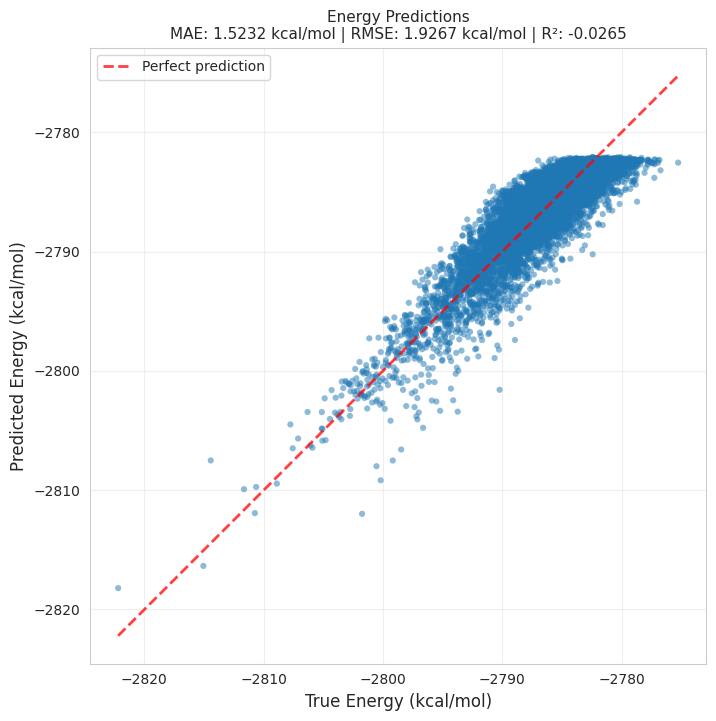

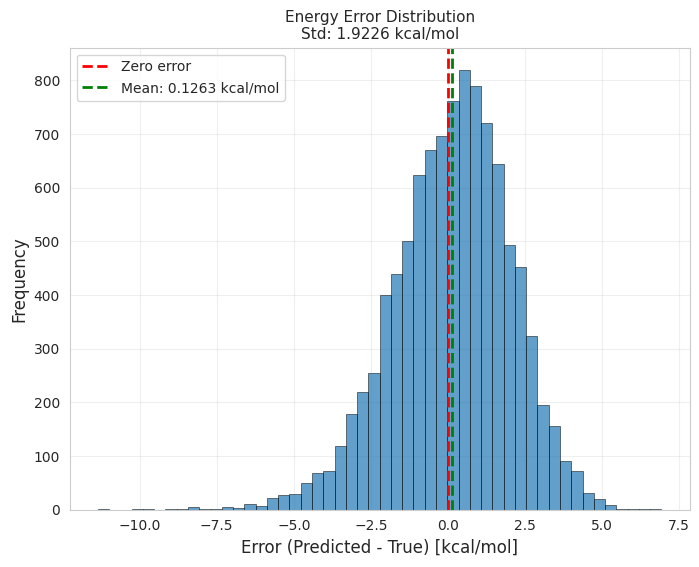

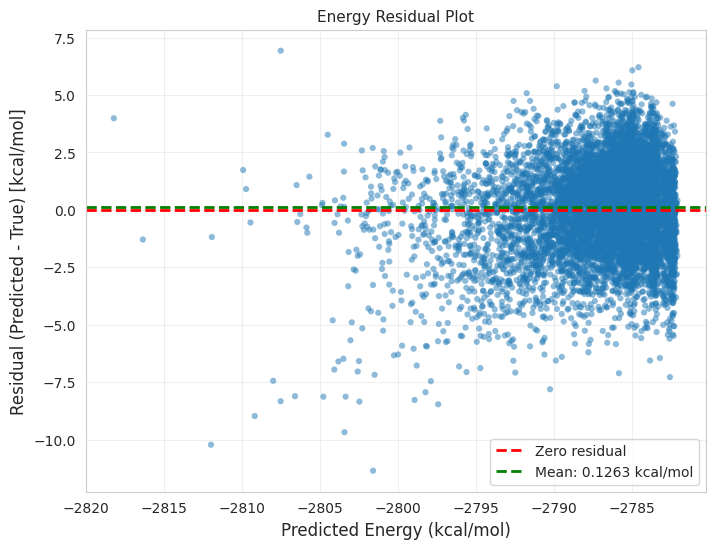

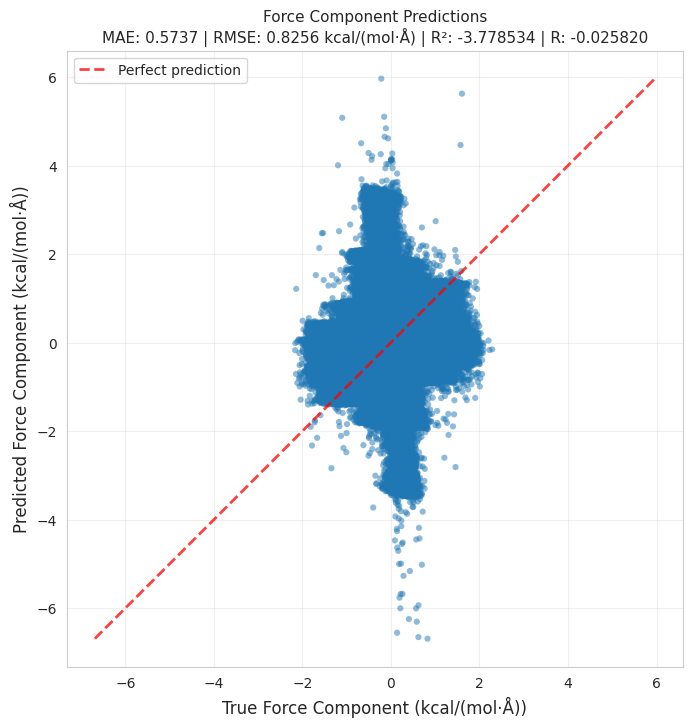

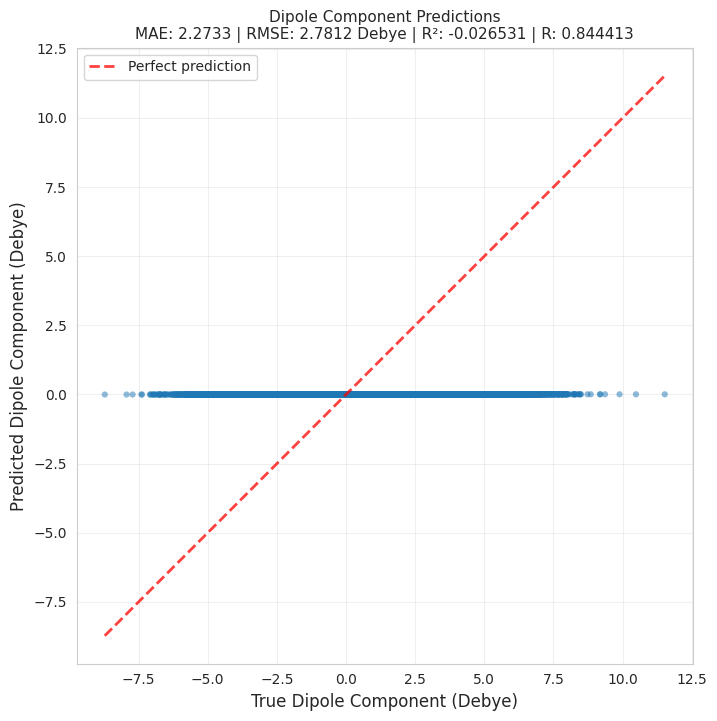

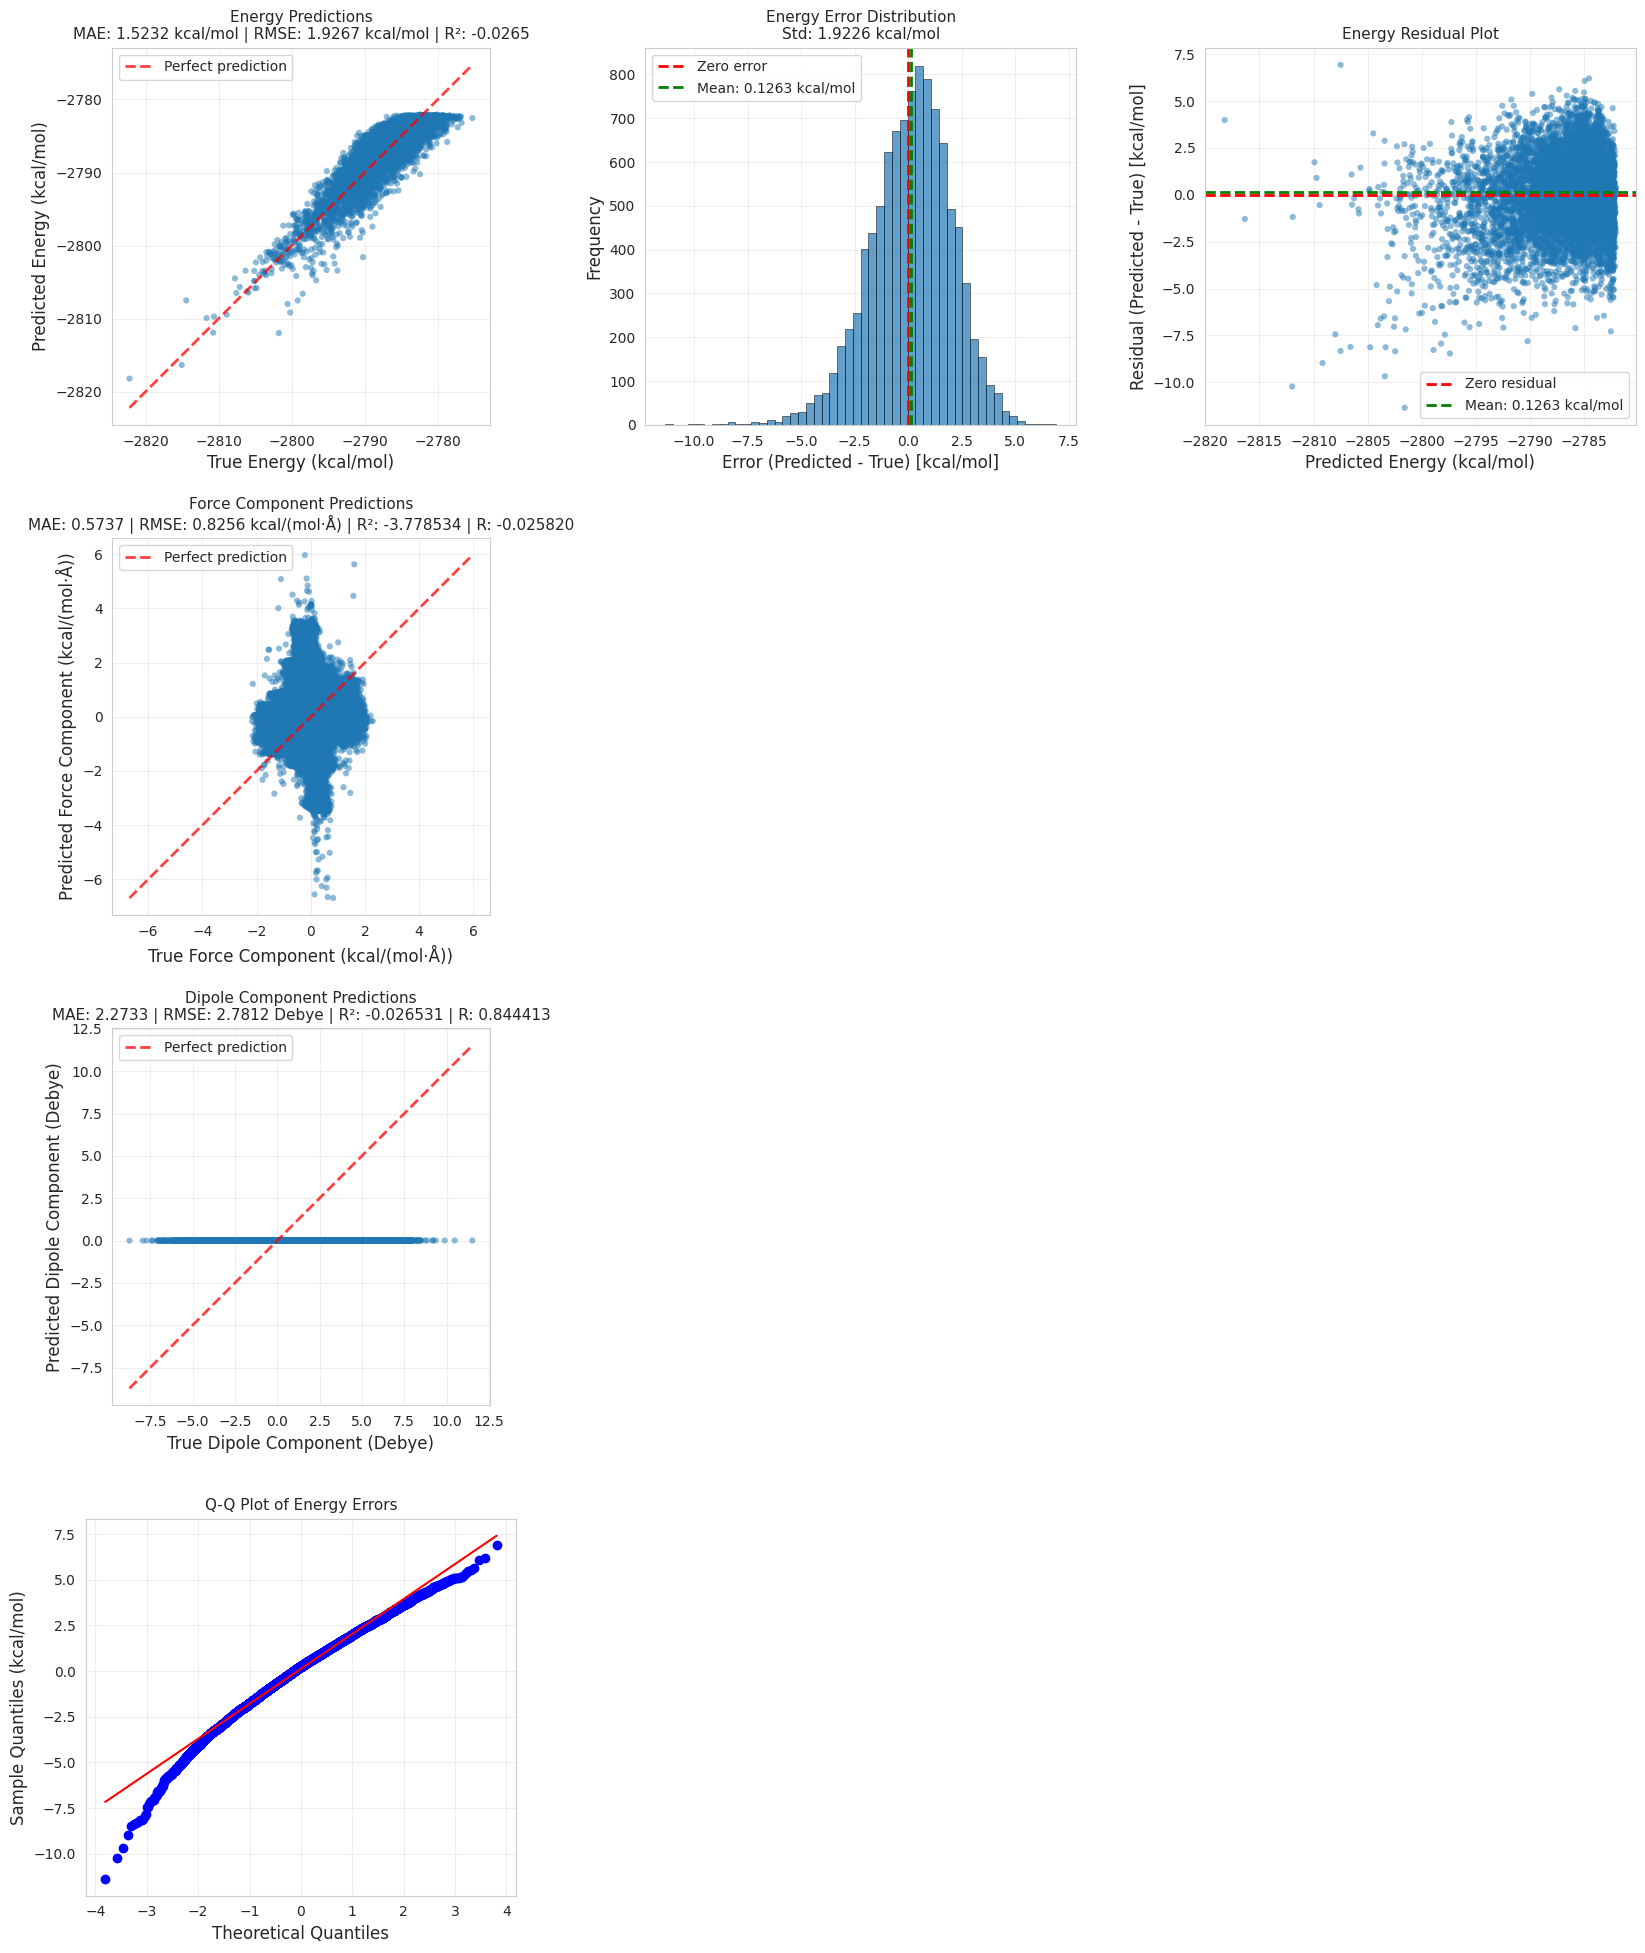

In [11]:
output = main(args)

In [12]:
output.keys()


dict_keys(['energy_pred', 'energy_targets', 'force_pred', 'force_targets', 'dipole_pred', 'dipole_targets', 'metrics', 'R', 'Z', 'E', 'F', 'D', 'Ef'])

In [26]:
output["errors_energy"] = output["energy_pred"] - output["energy_targets"]

In [27]:
D_mag = np.linalg.norm(output["D"], axis=-1)

Ef_mag = np.linalg.norm(output["Ef"], axis=-1)

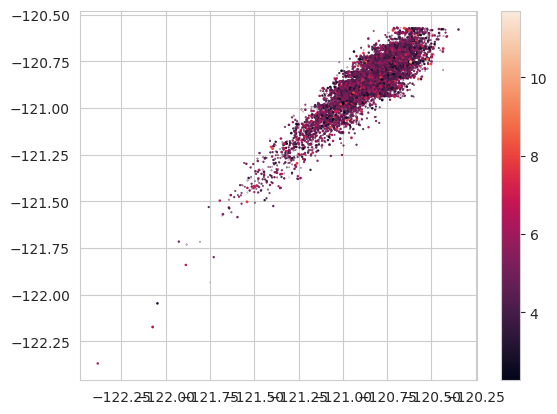

In [87]:
s = plt.scatter(output["energy_targets"], output["energy_pred"], c=D_mag, s=Ef_mag/100)
plt.colorbar(s)

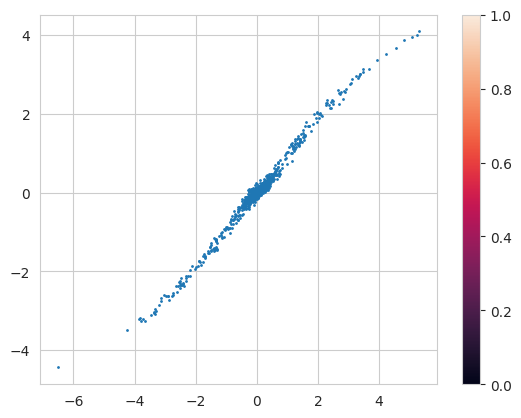

In [42]:
s = plt.scatter(output["dipole_targets"][-1000:].reshape(-1,3)[:,0], 
                output["dipole_pred"][-1000:].reshape(-1,3)[:,0], s=1)
plt.colorbar(s)

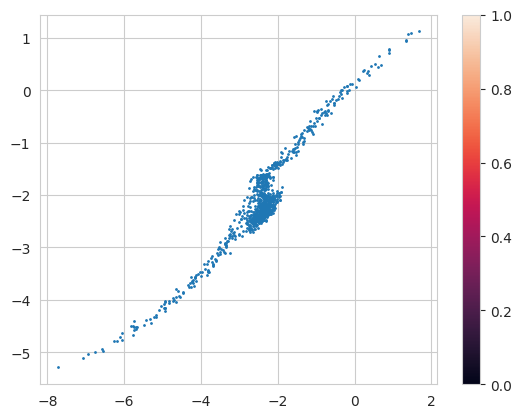

In [44]:
s = plt.scatter(output["dipole_targets"][-1000:].reshape(-1,3)[:,2], 
                output["dipole_pred"][-1000:].reshape(-1,3)[:,2], s=1)
plt.colorbar(s)

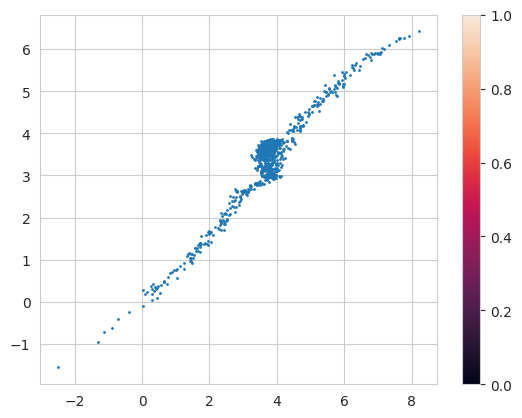

In [43]:
s = plt.scatter(output["dipole_targets"][-1000:].reshape(-1,3)[:,1], 
                output["dipole_pred"][-1000:].reshape(-1,3)[:,1], s=1)
plt.colorbar(s)

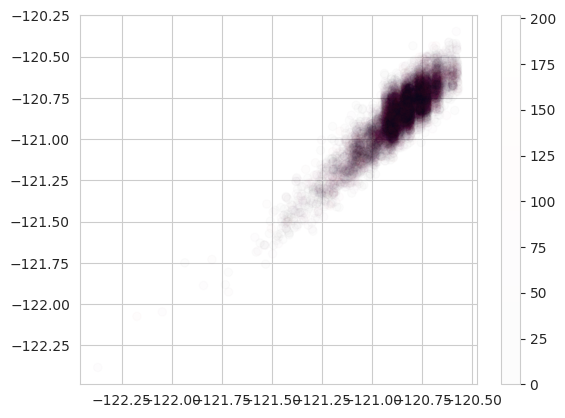

In [46]:
s = plt.scatter(output["energy_pred"], output["energy_targets"], c=Ef_mag, alpha=0.01)
plt.colorbar(s)

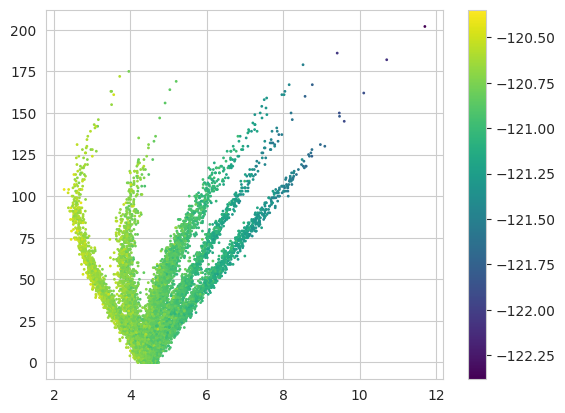

In [47]:
s = plt.scatter(D_mag, Ef_mag, c=output["E"], cmap="viridis", s=1)
plt.colorbar(s)

In [ ]:
s = plt.scatter(D_mag, Ef_mag, c=output["energy_errors"], cmap="viridis", s=0.1)
plt.colorbar(s)

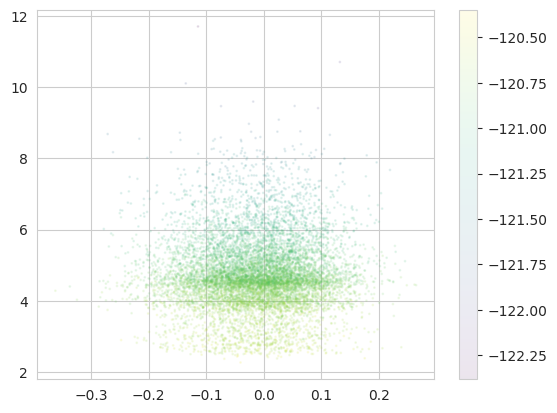

In [89]:
s = plt.scatter(output["errors_energy"], D_mag, c=output["E"], cmap="viridis", s=1, alpha=0.1)
plt.colorbar(s)

In [81]:
23.06*((output["errors_energy"][Ef_mag > 50])**2).mean()**0.5

np.float32(1.911498)

In [ ]:
((output["errors_energy"][Ef_mag < 25])**2).mean()